# MM2 Classification Project

![announcement-article-articles-copy-coverage.jpg](attachment:announcement-article-articles-copy-coverage.jpg)

Table of contents:
* [1. Project Overview](#chapter1)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Data Preprocessing)](#chapter5)
* [6. Exploratory Data Analysis (EDA)](#chapter6)
* [7. Modelling](#chapter7)
* [8. Model evaluation metrics](#chapter8)
* [9. Model performance analysis](#chapter9)
* [10. Conclusion](#chapter10)
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Meet the team: <a class="anchor" id="section_1_1"></a>

> - Obed Segwate Mabowa
    - <mabowaobed98@gmail.com>
> - Ndivhuwo Justin Tshifaro
    - <njtshifaro@gmail.com>
> - Sinenkosi Sikhakhane
    - <sikhakhanesnenkosi@gmail.com>
> - Ntokozo Sbusiso Hadebe
    - <bighope95@gmail.com>
> -
    - <>
> -
    - <>

### 1.1 Introduction: <a class="anchor" id="section_1_1"></a>

<b> Objective of the Project:</b>

<b> Data Source:</b>

<b> Importance of the Study:</b>

<b> Key Questions or Hypotheses:</b>

<b> Methodology Overview:</b>

<b> Structure of the Notebook:</b>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>
+ For data loading, manipulation, and analysis: `Pandas`, `csv`, `string`, `re`, `nltk`, `wordcloud` and `Numpy`.
+ For data visualization: `Matplotlib` and `Seaborn`

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [1]:
# Libraries for data loading, manipulation and analysis
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from collections import Counter
from nltk.probability import FreqDist
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')


## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the Data folder which contains two files `test.csv` and `train.csv`. To better manipulate and analyse the `test.csv` and `train.csv` files, it was loaded into a Pandas Data Frame using the Pandas function, `pd.read_csv()` and referred to as `train_data` and `test_data`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [2]:
# Loading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [4]:
train_data

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business
...,...,...,...,...,...
5515,"Samsung sends out invites for ‘Unpacked 2024’,...",Samsung is most likely to announce next-genera...,Samsung plans to reveal the next-generation fl...,https://indianexpress.com/article/technology/t...,technology
5516,Google Pixel 8 Pro accidentally appears on off...,The Pixel 8 Pro will most likely carry over it...,Google once again accidentally gave us a glimp...,https://indianexpress.com/article/technology/m...,technology
5517,Amazon ad on Google Search redirects users to ...,Clicking on the real looking Amazon ad will op...,A new scam seems to be making rounds on the in...,https://indianexpress.com/article/technology/t...,technology
5518,"Elon Musk’s X, previously Twitter, now worth l...","Elon Musk's X, formerly Twitter, has lost more...",More than a year after Elon Musk acquired Twit...,https://indianexpress.com/article/technology/s...,technology


In [5]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [6]:
# Previewing the train data
print(f'Train cvs summary: {train_data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
Train cvs summary: None


In [7]:
# Previewing the test data
print(f'Test cvs summary: {test_data.info(2)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB
Test cvs summary: None


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Data cleaning is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.

In [8]:
# Check for missing values
print(f'Missing values in the train dataset: {train_data.isnull().sum()}')
print(f'Missing values in the test dataset: {test_data.isnull().sum()}')

# Drop rows with missing values or fill them
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Missing values in the train dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64
Missing values in the test dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [9]:
train_data.describe()

,headlines,description,content,url,category
count,5520,5520,5520,5520,5520
unique,5512,5508,5513,5514,5
top,International Education Day 2024: Know why it ...,The university has removed the requirements of...,Grand Slam fever grips tennis fans all over th...,https://indianexpress.com/article/education/kc...,education
freq,2,2,5,2,1520


In [10]:
test_data.describe()

,headlines,description,content,url,category
count,2000,2000,2000,2000,2000
unique,2000,2000,2000,2000,5
top,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
freq,1,1,1,1,400


## 6. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter6"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

#### 6.1 EDA: Category Distribution

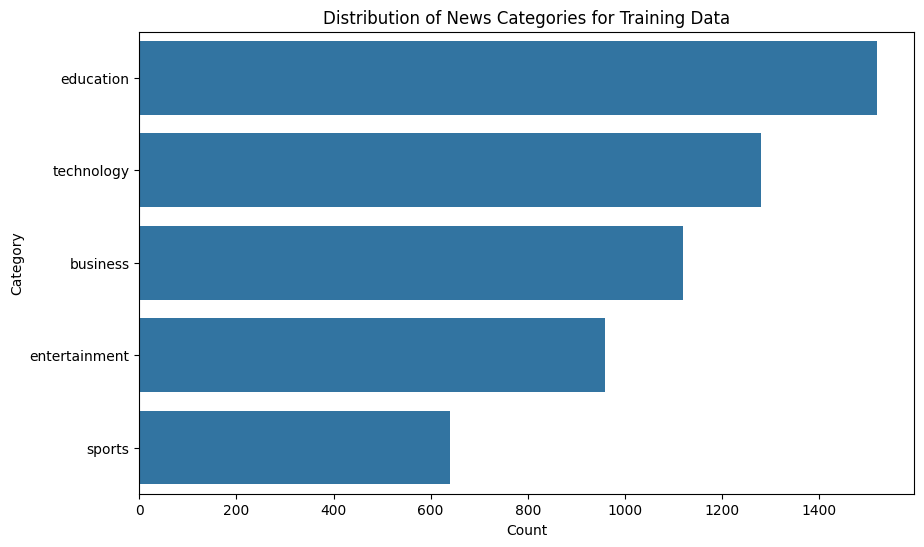

In [11]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories for Training Data')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

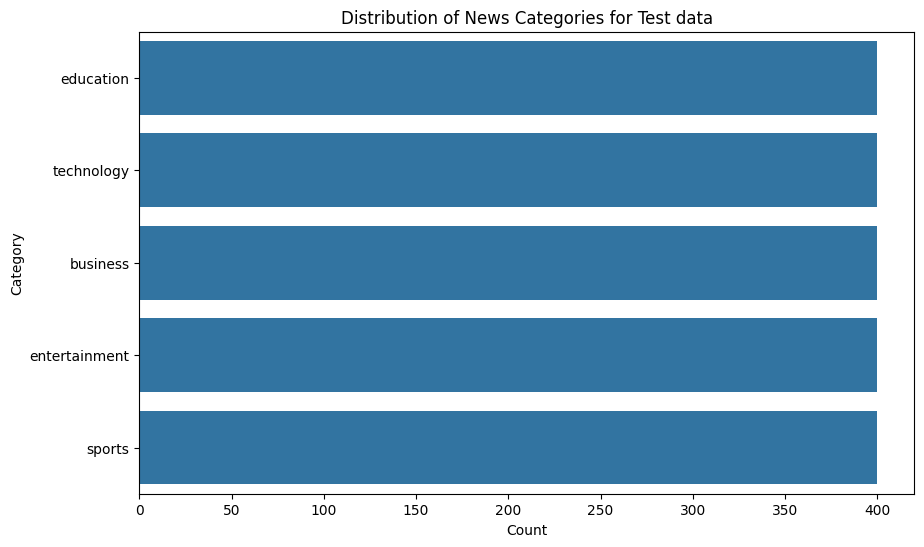

In [12]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=test_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories for Test data')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### Interpretation

#### 6.2 EDA: Text Length Analysis

In [13]:
train_data_EDA = train_data.copy()

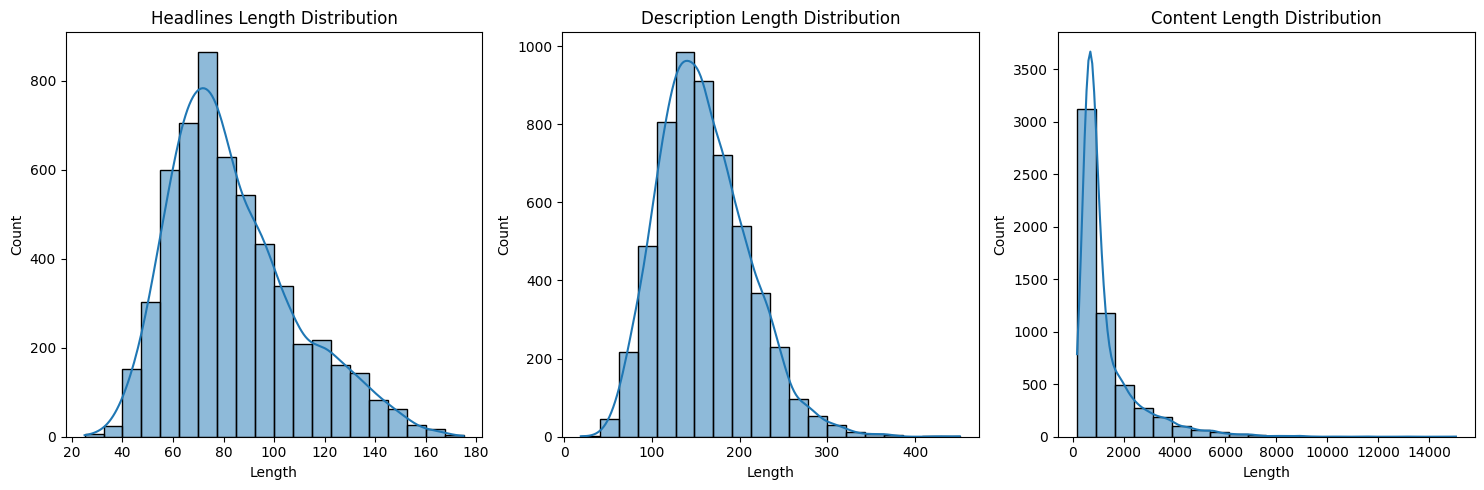

In [14]:
# Calculate the length of each text field
train_data_EDA['headlines_length'] = train_data_EDA['headlines'].apply(len)
train_data_EDA['description_length'] = train_data_EDA['description'].apply(len)
train_data_EDA['content_length'] = train_data_EDA['content'].apply(len)


# Plot the distribution of text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data_EDA['headlines_length'], bins=20, kde=True)
plt.title('Headlines Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 2)
sns.histplot(train_data_EDA['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 3)
sns.histplot(train_data_EDA['content_length'], bins=20, kde=True)
plt.title('Content Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

#### Interpretation

#### 6.3 EDA: Text Length Distribution by Category

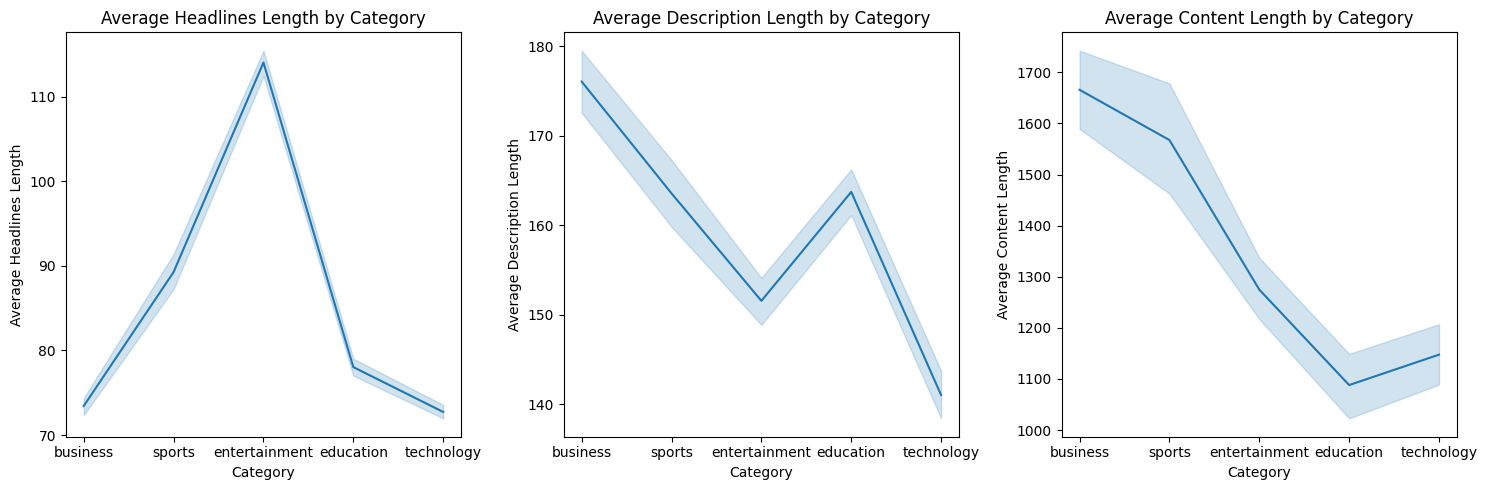

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=train_data_EDA, x='category', y='headlines_length', estimator='mean')
plt.title('Average Headlines Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Headlines Length')

plt.subplot(1, 3, 2)
sns.lineplot(data=train_data_EDA, x='category', y='description_length', estimator='mean')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')

plt.subplot(1, 3, 3)
sns.lineplot(data=train_data_EDA, x='category', y='content_length', estimator='mean')
plt.title('Average Content Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Content Length')

plt.tight_layout()
plt.show()

#### Interpretation

#### 6.5 WordCloud

Word Cloud for each column in the Train Data

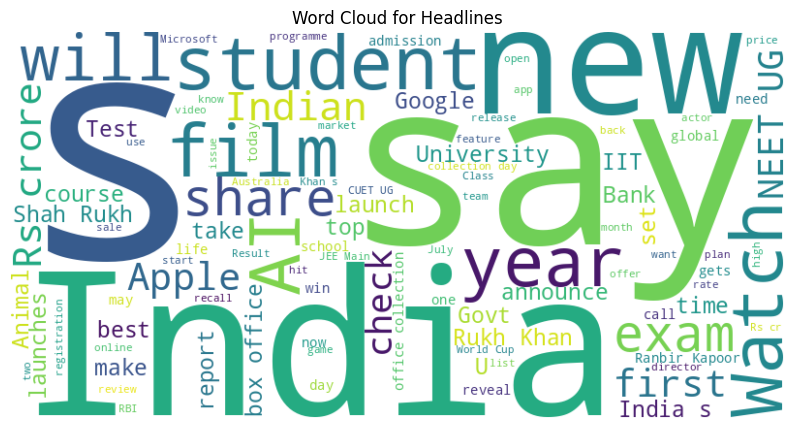

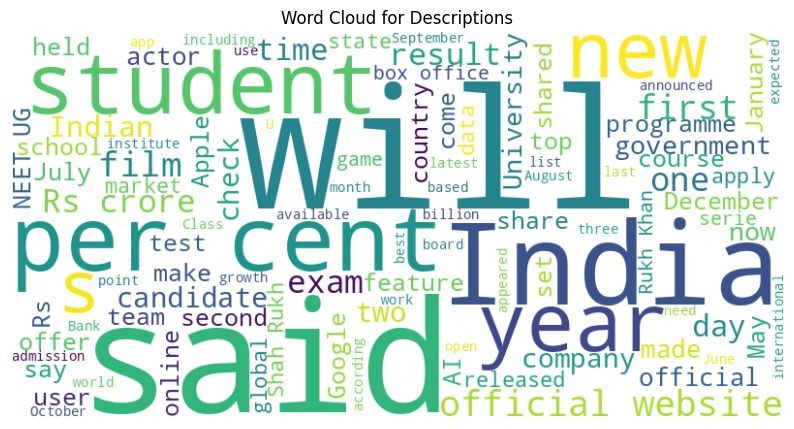

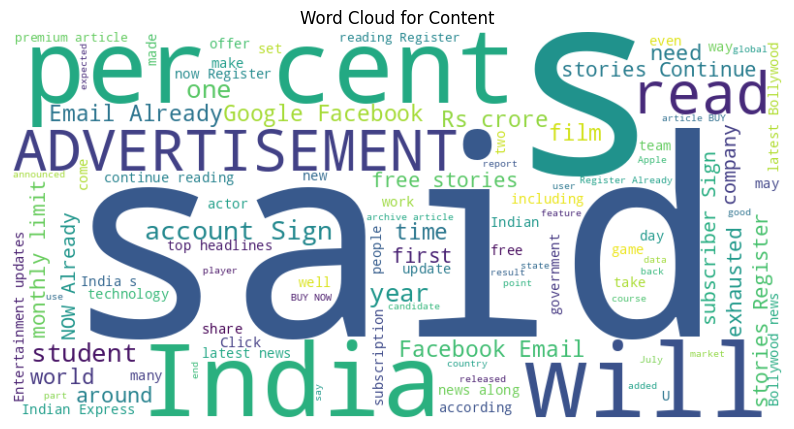

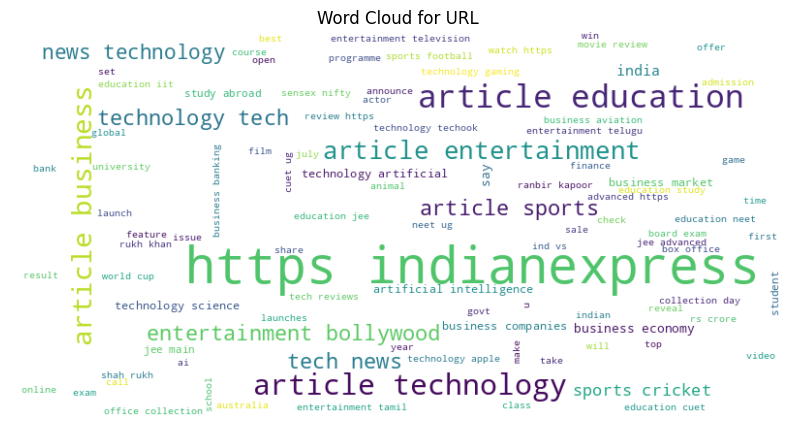

In [16]:
# Word cloud
def generate_word_cloud(text_column, title):
    all_text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis('off')
    plt.show()

generate_word_cloud(train_data_EDA['headlines'], 'Headlines')
generate_word_cloud(train_data_EDA['description'], 'Descriptions')
generate_word_cloud(train_data_EDA['content'], 'Content')
generate_word_cloud(train_data_EDA['url'], 'URL')

## 5. Data Preprocessing <a class="anchor" id="chapter5"></a>

This section covers the data preprocessing, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens).strip()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Apply cleaning function to the text fields
train_data['headlines'] = train_data['headlines'].apply(clean_text)
train_data['description'] = train_data['description'].apply(clean_text)
train_data['content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data.head()

,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,https://indianexpress.com/article/business/ban...,business
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televis ltd monday report ...,https://indianexpress.com/article/business/com...,business
2,akasa air well capitalis grow much faster ceo ...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,https://indianexpress.com/article/business/mar...,business
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,https://indianexpress.com/article/business/eco...,business
4,state borrow cost soar highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,https://indianexpress.com/article/business/eco...,business


In [19]:
# Apply cleaning function to the text fields
test_data['headlines'] = test_data['headlines'].apply(clean_text)
test_data['description'] = test_data['description'].apply(clean_text)
test_data['content'] = test_data['content'].apply(clean_text)

# Display cleaned text
test_data.head()

,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,https://indianexpress.com/article/business/com...,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...,https://indianexpress.com/article/education/sb...,education
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,https://indianexpress.com/article/entertainmen...,entertainment
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...,https://indianexpress.com/article/technology/t...,technology
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,https://indianexpress.com/article/business/ada...,business


In [20]:
train_data

,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,https://indianexpress.com/article/business/ban...,business
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televis ltd monday report ...,https://indianexpress.com/article/business/com...,business
2,akasa air well capitalis grow much faster ceo ...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,https://indianexpress.com/article/business/mar...,business
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,https://indianexpress.com/article/business/eco...,business
4,state borrow cost soar highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,https://indianexpress.com/article/business/eco...,business
...,...,...,...,...,...
5515,samsung send invit unpack new galaxi seri aifo...,samsung like announc nextgener galaxi seri sma...,samsung plan reveal nextgener flagship galaxi ...,https://indianexpress.com/article/technology/t...,technology
5516,googl pixel pro accident appear offici websit,pixel pro like carri predecessor design langua...,googl accident gave us glimps upcom flagship p...,https://indianexpress.com/article/technology/m...,technology
5517,amazon ad googl search redirect user microsoft...,click real look amazon ad open page suggest pc...,new scam seem make round internet legitimatelo...,https://indianexpress.com/article/technology/t...,technology
5518,elon musk x previous twitter worth less half paid,elon musk x formerli twitter lost half valuat ...,year elon musk acquir twitter billion platform...,https://indianexpress.com/article/technology/s...,technology


In [21]:
train_data.isna().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [22]:
test_data.isna().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

# Preprocessing Tasks for Classification

We have already cleaned the text data. We will now convert text data into numerical representations using TF-IDF vectorization. This step was covered previously, so we will move to model training.

Text Vectorization using TF-IDF

In [24]:
# Combine text fields into a single field for vectorization
train_data['combined_text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['url'] + ' ' + train_data['content']
test_data['combined_text'] = train_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['url'] + ' ' + test_data['content']

Extract features and target for training data and test data

In [25]:
# Extract features and target for training data
X = train_data['combined_text']
y = train_data['category']

# Extract features and target for testing data
X_test = test_data['combined_text']
y_test = test_data['category']

Encode the target variable

In [26]:
# Encode the target variable
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

y_test_encoded = label_encoder.fit_transform(y_test)

In [27]:
#Split train data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
 print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4416,) (1104,) (4416,) (1104,)


In [29]:
print(X_test.shape, y_test_encoded.shape)

(2000,) (2000,)


In [30]:
train_data.isna().sum()

headlines        0
description      0
content          0
url              0
category         0
combined_text    0
dtype: int64

#More EDA

In [31]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = train_data['category'].unique()
for category in categories:
    print(f"Most common words in {category}:")
    top_words = get_top_n_words(train_data[train_data['category'] == category]['combined_text'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("\n")

Most common words in business:
cent: 60.476920119894416
rs: 48.292204328896766
india: 39.472811994664966
said: 39.16408755418256
crore: 38.44415618012677
bank: 37.35939274481506
subscrib: 35.867260048699045
market: 30.79488276758605
year: 24.160561659514208
nifti: 24.03922568602925


Most common words in sports:
india: 23.061777798662874
test: 20.912716647286366
cricket: 19.32854454815154
australia: 16.151488982944098
world: 15.891157587411191
play: 15.482970617713832
team: 14.85799591431734
said: 14.77093754440643
cup: 14.18331369891561
match: 13.259145289855793


Most common words in entertainment:
film: 42.08074835461241
khan: 29.84096902947505
rs: 25.59033658974175
bollywood: 25.318240359996054
latest: 24.038900590101328
actor: 23.230936293393626
news: 23.053902561176432
updat: 22.812057361303815
kapoor: 22.542826925107267
said: 22.261500726261417


Most common words in education:
student: 58.452097473386125
exam: 56.07827467411897
iit: 49.87751833404013
univers: 47.123007603909436

## 7. Modelling <a class="anchor" id="chapter7"></a>

>Logistic Regression  

 >Naive Bayes

 >Support Vector Machine (SVM)

 >Random Forest

 >Neural Network (MLPClassifier)

Model Training
Logistic Regression
Naive Bayes
Support Vector Machine (SVM)
Random Forest
Neural Network (MLPClassifier)

In [34]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(max_iter=1000)
}

In [35]:
# Train and evaluate models using a pipeline
results = {}
f1_scores = []
accuracies = []

In [36]:
for model_name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = pipeline.predict(X_val)

    # Calculate evaluation metrics
    model_accuracy = accuracy_score(y_val, y_pred)
    model_f1 = f1_score(y_val, y_pred, average='weighted')
    model_report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)

    # Store results
    results[model_name] = {
        'accuracy': model_accuracy,
        'f1_score': model_f1,
        'classification_report': model_report
    }

    # Append f1 score and accuracy for plotting
    f1_scores.append(model_f1)
    accuracies.append(model_accuracy)

## 8. Model evaluation metrics <a class="anchor" id="chapter8"></a>

In [38]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print(f"Classification Report:\n{metrics['classification_report']}\n")

Model: Logistic Regression
Accuracy: 0.9918478260869565
F1 Score: 0.9918562938811766
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.99      0.99       245
    education       1.00      0.99      1.00       274
entertainment       0.99      0.99      0.99       178
       sports       0.99      0.99      0.99       137
   technology       0.99      0.99      0.99       270

     accuracy                           0.99      1104
    macro avg       0.99      0.99      0.99      1104
 weighted avg       0.99      0.99      0.99      1104


Model: Naive Bayes
Accuracy: 0.980072463768116
F1 Score: 0.9799887001141391
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       245
    education       0.97      1.00      0.99       274
entertainment       0.98      1.00      0.99       178
       sports       0.99      0.94      0.97       137
   technology     

### 8.1 Model Analysis
Logistic Regression performs very well with high accuracy and F1 score. It shows strong performance across all classes, particularly notable for its balanced precision and recall.

Naive Bayes achieves the highest accuracy and F1 score among all models evaluated. It demonstrates excellent precision and recall across all classes, indicating robust performance in classifying news articles.

SVM shows strong performance with high accuracy and F1 score. It performs consistently well across most classes, although slightly lower than Naive Bayes in overall metrics.

Random Forest performs well with decent accuracy and F1 score. It demonstrates good performance in some classes but shows slightly lower metrics compared to Naive Bayes and Logistic Regression.

Naive Bayes stands out as the top-performing model in this evaluation, achieving the highest accuracy and F1 score. It consistently shows strong precision and recall across all classes, making it the recommended choice for this classification task based on the provided data and evaluation results.

## 9. Model performance analysis <a class="anchor" id="chapter9"></a>

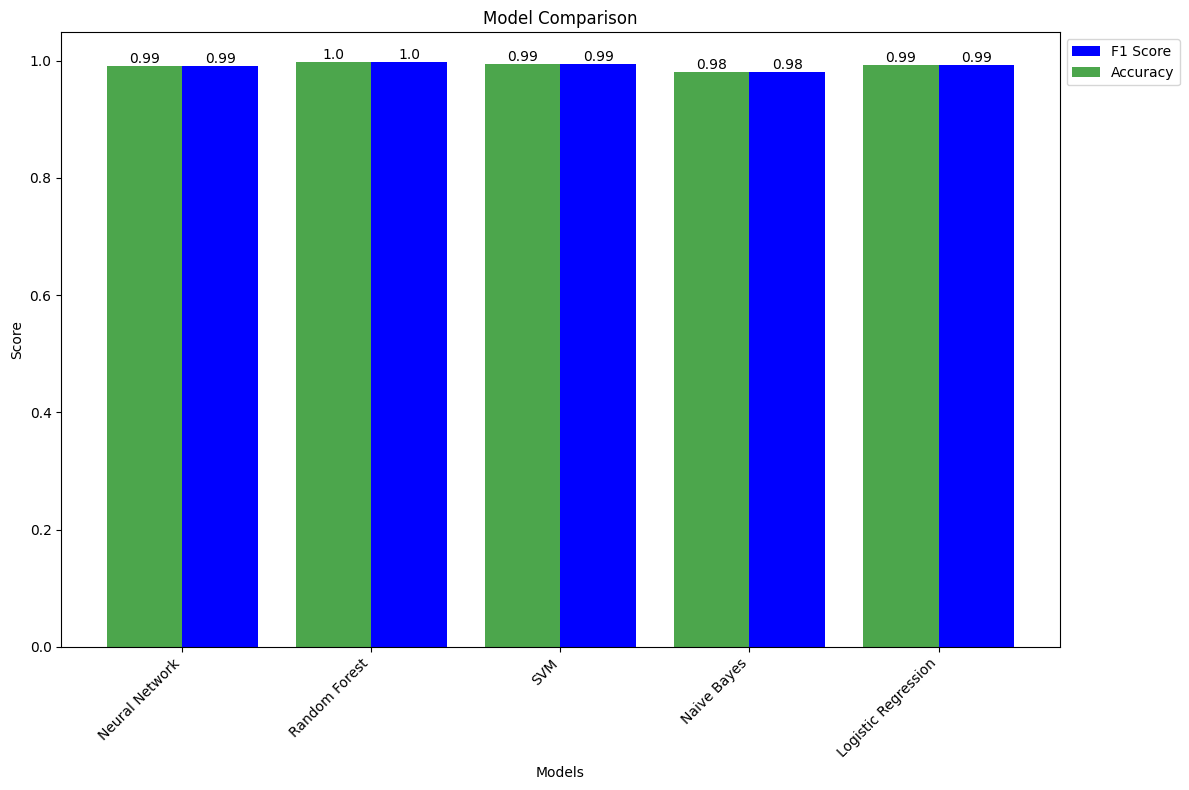

In [39]:
# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.4

# Positions of the models on the x-axis
positions = range(len(results))

# Plot F1 Score bars
bars1 = plt.bar([pos - bar_width/2 for pos in positions], f1_scores, width=bar_width, color='Blue', label='F1 Score')

# Plot Accuracy bars
bars2 = plt.bar([pos + bar_width/2 for pos in positions], accuracies, width=bar_width, color='Green', alpha=0.7, label='Accuracy')

# Label models on the x-axis with slanted text
plt.xticks(positions, list(results.keys()), rotation=45, ha='right')

plt.xlabel('Models')  # Y-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Model Comparison')  # Plot title

# Add numbers on top of bars
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1, round(yval1, 2), ha='center', va='bottom', color='black')

    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2, round(yval2, 2), ha='center', va='bottom', color='black')

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # Place legend outside the bars

plt.gca().invert_xaxis()  # Invert x-axis to display models from right to left
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


#Model Evaluation on the test Set

In [41]:
# Initialize models (assuming they are already defined)
models_test = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state = 42),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state = 42),
    'Neural Network': MLPClassifier(max_iter=1000,random_state = 42)
}

In [42]:
X_test

0       rbi revis definit politicallyexpos person kyc ...
1       ndtv q net profit fall rs crore impact lower r...
2       akasa air well capitalis grow much faster ceo ...
3       india current account deficit declin sharpli g...
4       state borrow cost soar highest far fiscal cite...
                              ...                        
1995    rambha say rajinikanth act angri hug salman kh...
1996    main atal hoon pankaj tripathi drop first song...
1997    kareena kapoor saif ali khan vacat pataudi pal...
1998    tiger box offic collect day earli report salma...
1999    mammootti darshana rajendran malayalam actor s...
Name: combined_text, Length: 2000, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [59]:
# Example function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label_encoder):
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    return accuracy, f1, report

In [60]:
# Now evaluate on the test set
results_test = {}
f1_scores_test = []
accuracies_test = []

for model_name, model in models_test.items():
    model_accuracy, model_f1_test, model_report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label_encoder)

    # Store results
    results_test[model_name] = {
        'accuracy': model_accuracy,
        'f1_score': model_f1_test,  # Corrected variable name
        'classification_report': model_report
    }

    # Extract specific metrics from the report
    accuracy = model_report['accuracy']
    macro_precision = model_report['macro avg']['precision']
    macro_recall = model_report['macro avg']['recall']
    macro_f1 = model_report['macro avg']['f1-score']

    # Print or use the metrics as needed
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Macro Precision: {macro_precision}")
    print(f"Macro Recall: {macro_recall}")
    print(f"Macro F1-score: {macro_f1}")
    print()

    # Append f1 score and accuracy for plotting
    f1_scores_test.append(model_f1_test)
    accuracies_test.append(model_accuracy)

Model: Logistic Regression
Accuracy: 0.9835
Macro Precision: 0.9836143223969451
Macro Recall: 0.9834999999999999
Macro F1-score: 0.9835286654533599

Model: Naive Bayes
Accuracy: 0.967
Macro Precision: 0.967715199072944
Macro Recall: 0.967
Macro F1-score: 0.9668943897678265

Model: SVM
Accuracy: 0.9875
Macro Precision: 0.9876295557568584
Macro Recall: 0.9875
Macro F1-score: 0.9875247505734327

Model: Random Forest
Accuracy: 0.9895
Macro Precision: 0.989688781843958
Macro Recall: 0.9894999999999999
Macro F1-score: 0.9895034059266783

Model: Neural Network
Accuracy: 0.9875
Macro Precision: 0.9875771680395198
Macro Recall: 0.9875
Macro F1-score: 0.9875171360895829



In [62]:
# Print test results (optional)
for model_name, metrics_test in results_test.items():
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {metrics_test['accuracy']}")
    print(f"Test F1 Score: {metrics_test['f1_score']}")
    print(f"Test Classification Report:\n{metrics_test['classification_report']}")
    print("\n")

Model: Logistic Regression
Test Accuracy: 0.9835
Test F1 Score: 0.9835286654533598
Test Classification Report:
{'business': {'precision': 0.9772727272727273, 'recall': 0.9675, 'f1-score': 0.9723618090452262, 'support': 400}, 'education': {'precision': 1.0, 'recall': 0.99, 'f1-score': 0.9949748743718593, 'support': 400}, 'entertainment': {'precision': 0.9949748743718593, 'recall': 0.99, 'f1-score': 0.9924812030075189, 'support': 400}, 'sports': {'precision': 0.9875930521091811, 'recall': 0.995, 'f1-score': 0.991282689912827, 'support': 400}, 'technology': {'precision': 0.9582309582309583, 'recall': 0.975, 'f1-score': 0.9665427509293681, 'support': 400}, 'accuracy': 0.9835, 'macro avg': {'precision': 0.9836143223969451, 'recall': 0.9834999999999999, 'f1-score': 0.9835286654533599, 'support': 2000}, 'weighted avg': {'precision': 0.9836143223969452, 'recall': 0.9835, 'f1-score': 0.9835286654533598, 'support': 2000}}


Model: Naive Bayes
Test Accuracy: 0.967
Test F1 Score: 0.966894389767826

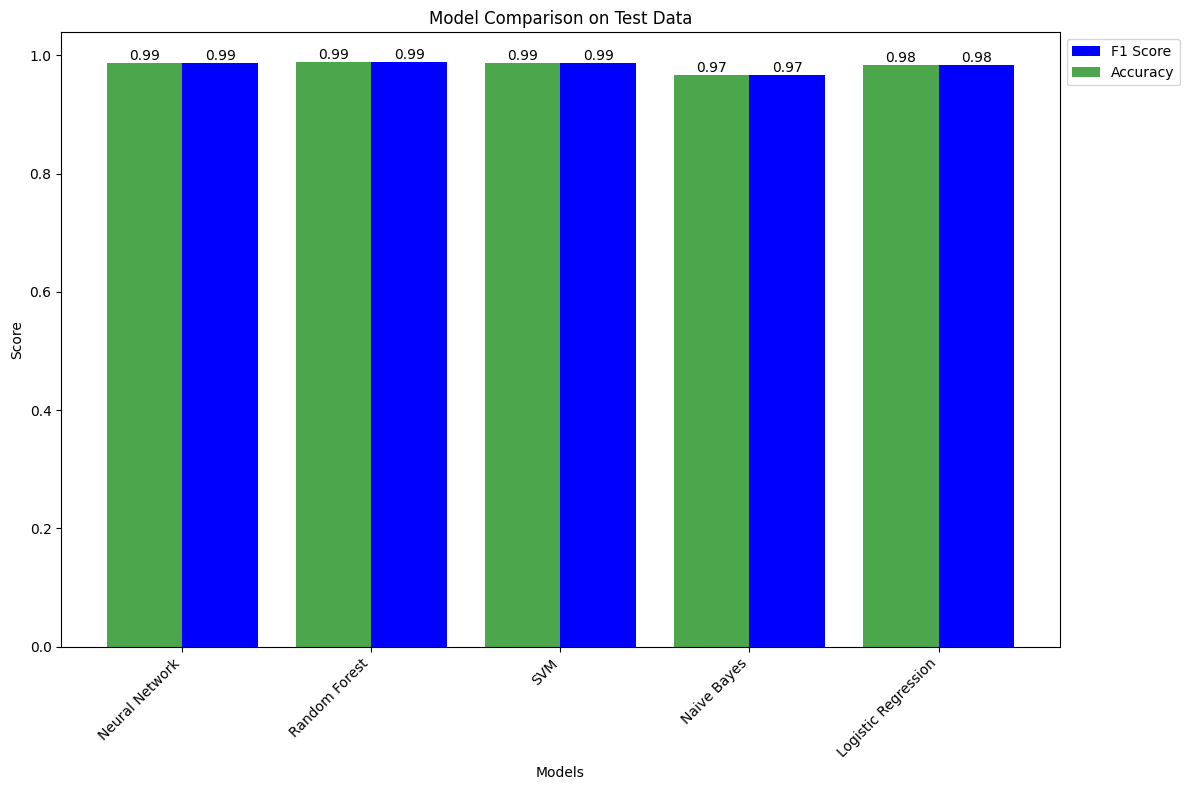

In [63]:
import matplotlib.pyplot as plt

# Assuming results_test, f1_scores_test, accuracies_test are already populated from your test evaluation

# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.4

# Positions of the models on the x-axis
positions = range(len(results_test))

# Plot F1 Score bars
bars1 = plt.bar([pos - bar_width/2 for pos in positions], f1_scores_test, width=bar_width, color='Blue', label='F1 Score')

# Plot Accuracy bars
bars2 = plt.bar([pos + bar_width/2 for pos in positions], accuracies_test, width=bar_width, color='Green', alpha=0.7, label='Accuracy')

# Label models on the x-axis with slanted text
plt.xticks(positions, list(results_test.keys()), rotation=45, ha='right')

plt.xlabel('Models')  # X-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Model Comparison on Test Data')  # Plot title

# Add numbers on top of bars
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1, round(yval1, 2), ha='center', va='bottom', color='black')

    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2, round(yval2, 2), ha='center', va='bottom', color='black')

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # Place legend outside the bars

plt.gca().invert_xaxis()  # Invert x-axis to display models from right to left
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

## 10. Conclusion <a class="anchor" id="chapter10"></a>

<b> Summary of Key Findings:</b>

<b> Evaluation of the Methodology:</b>

<b> Implications of the Findings:</b>

<b> Suggestions for Future Work:</b>

<b> Reflection on the Data Source and Quality:</b>

<b> Concluding Thoughts:</b>

## 11. References <a class="anchor" id="chapter11"></a>